In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [ ]:
project_folder_path = '/content/drive/MyDrive/ML_projects/oralens Assignment'
train_data_path = project_folder_path + '/OA/TRAIN'
test_data_path = project_folder_path + '/OA/TEST'

train_caries_images_path = os.path.join(train_data_path, 'Caries')
train_gingivitis_images_path = os.path.join(train_data_path, 'Gingivitis')

test_caries_images_path = os.path.join(test_data_path, 'Caries')
test_gingivitis_images_path = os.path.join(test_data_path, 'Gingivitis')


In [ ]:
# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
#categorical for multi class classification

Found 2260 images belonging to 3 classes.
Found 598 images belonging to 3 classes.


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,035,203 (72.61 MB)

 Trainable params: 19,035,203 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# The checkpoint callback
checkpoint = ModelCheckpoint('best_model.keras',
                             monitor='val_loss',
                             save_best_only=True,
                             mode='min',
                             verbose=1)
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping, checkpoint]
)


Epoch 1/15
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8618 - loss: 0.3536
Epoch 1: val_loss improved from inf to 0.33436, saving model to best_model.keras
70/70 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accuracy: 0.8619 - loss: 0.3534 - val_accuracy: 0.8767 - val_loss: 0.3344
Epoch 2/15
 1/70 ━━━━━━━━━━━━━━━━━━━━ 1:58 2s/step - accuracy: 0.9688 - loss: 0.1602

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss improved from 0.33436 to 0.26861, saving model to best_model.keras
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9688 - loss: 0.1602 - val_accuracy: 0.9091 - val_loss: 0.2686
Epoch 3/15
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8717 - loss: 0.3584
Epoch 3: val_loss did not improve from 0.26861
70/70 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.8717 - loss: 0.3583 - val_accuracy: 0.8889 - val_loss: 0.3176
Epoch 4/15
 1/70 ━━━━━━━━━━━━━━━━━━━━ 1:53 2s/step - accuracy: 0.9375 - loss: 0.3583
Epoch 4: val_loss improved from 0.26861 to 0.19710, saving model to best_model.keras
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9375 - loss: 0.3583 - val_accuracy: 0.9545 - val_loss: 0.1971
Epoch 5/15
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8603 - loss: 0.3296
Epoch 5: val_loss did not improve from 0.19710
70/70 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.8604 - loss: 0.3296 - val_accuracy: 0.9045 - val_loss: 0.2841
Epoch 6/15
 1/70 ━━━

In [46]:

loss, accuracy = model.evaluate(validation_generator)
print(f'Validation loss: {loss}')
print(f'Validation accuracy: {accuracy}')


19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 651ms/step - accuracy: 0.9100 - loss: 0.2899
Validation loss: 0.27155324816703796
Validation accuracy: 0.9113712310791016


In [47]:
# import numpy as np
# import os
# from tensorflow.keras.preprocessing import image

# caries_folder_path = '/content/drive/MyDrive/ML_projects/oralens Assignment/OA/TEST/Gingivitis'

# true_caries = 0
# false_caries = 0
# for img in os.listdir(caries_folder_path):

#   img_path = os.path.join(caries_folder_path,img)
#   img = image.load_img(img_path, target_size=(150, 150))
#   img_array = image.img_to_array(img) / 255.0  # Rescale to [0, 1]
#   img_array = np.expand_dims(img_array, axis=0)

#   # Predict
#   prediction = model.predict(img_array)
#   # print(len(prediction[0]))
#   # print('Prediction (Caries=0, Gingivitis=1):', prediction)
#   if( prediction[0][0] <= 0.5 ):
#     true_caries += 1
#   else:
#     false_caries += 1
# print("true = ",true_caries)
# print("false = ",false_caries)

In [48]:
# import numpy as np
# import os
# from tensorflow.keras.preprocessing import image

# caries_folder_path = '/content/drive/MyDrive/ML_projects/oralens Assignment/OA/TEST/Healthy'

# true_caries = 0
# false_caries = 0
# for img in os.listdir(caries_folder_path):

#   img_path = os.path.join(caries_folder_path,img)
#   img = image.load_img(img_path, target_size=(150, 150))
#   img_array = image.img_to_array(img) / 255.0  # Rescale to [0, 1]
#   img_array = np.expand_dims(img_array, axis=0)

#   # Predict
#   prediction = model.predict(img_array)
#   # print(len(prediction[0]))
#   # print('Prediction (Caries=0, Gingivitis=1):', prediction)
#   if( prediction[0][0] <= 0.5 ):
#     true_caries += 1
#   else:
#     false_caries += 1
# print("true = ",true_caries)
# print("false = ",false_caries)

In [52]:
import os

num_params = model.count_params()

estimated_size_bytes = num_params * 4  # 4 bytes per parameter

estimated_size_MB = estimated_size_bytes / (1024 * 1024)

print(f"Estimated model size: {estimated_size_MB:.2f} MB")


Estimated model size: 72.61 MB


In [56]:
model.save('best_model.h5')

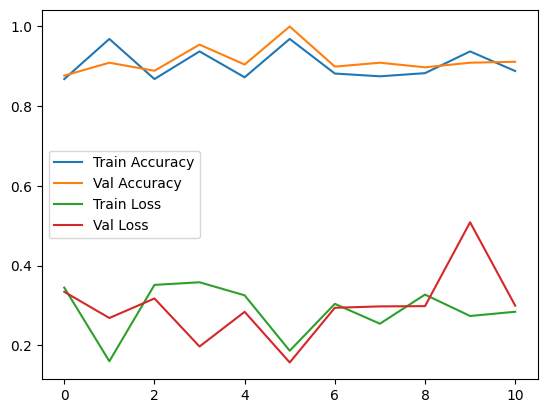

In [57]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_true = []
y_pred = []

for img_batch, label_batch in validation_generator:
    predictions = model.predict(img_batch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(label_batch, axis=1)
    y_true.extend(true_classes)
    y_pred.extend(predicted_classes)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=validation_generator.class_indices))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 866ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460

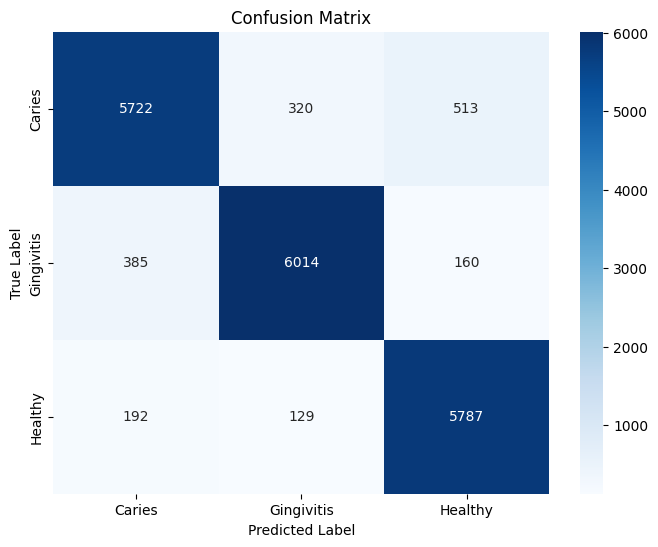

In [58]:
cm = confusion_matrix(y_true, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(),
            yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9116116949328894
Precision: 0.9119525433040635
Recall: 0.9116116949328894
F1 Score: 0.9114147891727106
